In [3]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
#from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical

from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix

from keras import regularizers
import os

In [4]:
from google.colab import drive

In [5]:
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
!ls "/content/drive/MyDrive/RawData"

'E.Anger. S.10 .neutral V..WAV'      saved_models
'E.Anger. S.11 .neutral V..WAV'     'Z.Anger. S10.neutral V.WAV'
'E.Anger. S.12 .neutral V..WAV'     'Z.Anger. S11.neutral V.WAV'
'E.Anger. S.13 .neutral V..WAV'     'Z.Anger. S12.neutral V.WAV'
'E.Anger. S.14 .neutral V..WAV'     'Z.Anger. S13.neutral V.WAV'
'E.Anger. S.15 .neutral V..WAV'     'Z.Anger. S14.neutral V.WAV'
'E.Anger. S.16 .neutral V..WAV'     'Z.Anger. S15.neutral V.WAV'
'E.Anger. S.17 .neutral V..WAV'     'Z.Anger. S16.neutral V.WAV'
'E.Anger. S.1.neutral V..WAV'	    'Z.Anger. S17.neutral V.WAV'
'E.Anger. S.2 .neutral V..WAV'	    'Z.Anger. S1.neutral V.WAV'
'E.Anger. S.3 .neutral V..WAV'	    'Z.Anger. S2.neutral V.WAV'
'E.Anger. S.4 .neutral V..WAV'	    'Z.Anger. S3.neutral V.WAV'
'E.Anger. S.5 .neutral V..WAV'	    'Z.Anger. S4.neutral V.WAV'
'E.Anger. S.6 .neutral V..WAV'	    'Z.Anger. S5.neutral V.WAV'
'E.Anger. S.7 .neutral V..WAV'	    'Z.Anger. S6.neutral V.WAV'
'E.Anger. S.8 .neutral V..WAV'	    'Z.Anger. S7.neutra

In [7]:
mylist= os.listdir('/content/drive/MyDrive/RawData')
print(mylist)

['Z.Anger. S17.neutral V.WAV', 'Z.Anger. S16.neutral V.WAV', 'Z.Anger. S12.neutral V.WAV', 'Z.Anger. S14.neutral V.WAV', 'Z.Anger. S15.neutral V.WAV', 'Z.Anger. S10.neutral V.WAV', 'Z.Anger. S11.neutral V.WAV', 'Z.Anger. S13.neutral V.WAV', 'Z.Anger. S1.neutral V.WAV', 'Z.Anger. S8.neutral V.WAV', 'Z.Anger. S7.neutral V.WAV', ' Z.Disgust. S1.neutral V.WAV', 'Z.Anger. S2.neutral V.WAV', 'Z.Anger. S5.neutral V.WAV', 'Z.Anger. S3.neutral V.WAV', ' Z.Disgust. S10 .neutral V.WAV', 'Z.Anger. S9.neutral V.WAV', 'Z.Anger. S4.neutral V.WAV', 'Z.Anger. S6.neutral V.WAV', ' Z.Disgust. S3.neutral V.WAV', ' Z.Disgust. S6.neutral V.WAV', ' Z.Disgust. S11 .neutral V.WAV', ' Z.Disgust. S13 .neutral V.WAV', ' Z.Disgust. S15 .neutral V.WAV', ' Z.Disgust. S14 .neutral V.WAV', ' Z.Disgust. S5.neutral V.WAV', ' Z.Disgust. S2.neutral V.WAV', ' Z.Disgust. S12 .neutral V.WAV', ' Z.Disgust. S4.neutral V.WAV', 'Z.Fear. S13.neutral V.WAV', 'Z.Fear. S1.neutral V.WAV', 'Z.Fear. S14.neutral V.WAV', ' Z.Disgust. S9 

In [8]:
rmdir /content/drive/MyDrive/RawData/.ipynb_checkpoints

rmdir: failed to remove '/content/drive/MyDrive/RawData/.ipynb_checkpoints': No such file or directory


In [9]:
data, sampling_rate = librosa.load('/content/drive/MyDrive/RawData/Z.Sadness.S14.neutral V..WAV')

Populating the interactive namespace from numpy and matplotlib


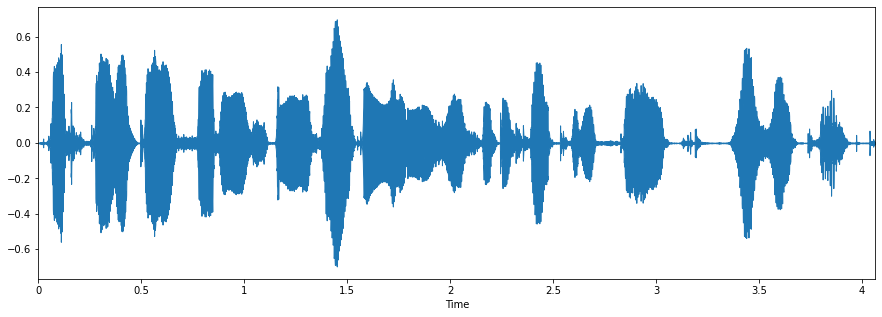

In [10]:
% pylab inline
import os
import pandas as pd
import librosa
import glob 

plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

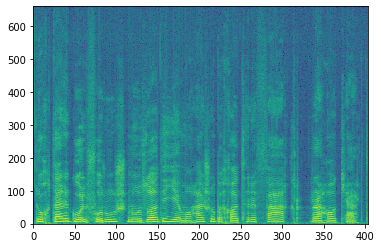

In [11]:
import matplotlib.pyplot as plt
import scipy.io.wavfile
import numpy as np
import sys


sr,x = scipy.io.wavfile.read('/content/drive/MyDrive/RawData/Z.Sadness.S14.neutral V..WAV')

## Parameters: 10ms step, 30ms window
nstep = int(sr * 0.01)
nwin  = int(sr * 0.03)
nfft = nwin

window = np.hamming(nwin)

## will take windows x[n1:n2].  generate
## and loop over n2 such that all frames
## fit within the waveform
nn = range(nwin, len(x), nstep)

X = np.zeros( (len(nn), nfft//2) )

for i,n in enumerate(nn):
    xseg = x[n-nwin:n]
    z = np.fft.fft(window * xseg, nfft)
    X[i,:] = np.log(np.abs(z[:nfft//2]))

plt.imshow(X.T, interpolation='nearest',
    origin='lower',
    aspect='auto')

plt.show()

In [12]:
emotion_list = []
gender_list  = []
feeling_list =[]
for item in mylist:
  item = item.strip()
  #print(item)
  if item != 'saved_models' and item != 'model.json' and item != 'Predictions.csv':
    feelings = (item.split('.')[1])
    
    gender = (item.split('.')[0])
    if gender =='Z':
      feeling_list.append('female_'+feelings)
    elif gender == 'E':
      feeling_list.append('male_'+feelings)
      

print(feeling_list)
uniquelist = list(set(feeling_list))
print(uniquelist)

['female_Anger', 'female_Anger', 'female_Anger', 'female_Anger', 'female_Anger', 'female_Anger', 'female_Anger', 'female_Anger', 'female_Anger', 'female_Anger', 'female_Anger', 'female_Disgust', 'female_Anger', 'female_Anger', 'female_Anger', 'female_Disgust', 'female_Anger', 'female_Anger', 'female_Anger', 'female_Disgust', 'female_Disgust', 'female_Disgust', 'female_Disgust', 'female_Disgust', 'female_Disgust', 'female_Disgust', 'female_Disgust', 'female_Disgust', 'female_Disgust', 'female_Fear', 'female_Fear', 'female_Fear', 'female_Disgust', 'female_Fear', 'female_Fear', 'female_Fear', 'female_Disgust', 'female_Disgust', 'female_Fear', 'female_Fear', 'female_Fear', 'female_Fear', 'female_Fear', 'female_Fear', 'female_ Happiness', 'female_Fear', 'female_Fear', 'female_ Happiness', 'female_Fear', 'female_ Happiness', 'female_ Happiness', 'female_ Happiness', 'female_ Happiness', 'female_ Happiness', 'female_ Happiness', 'female_ Happiness', 'female_ Happiness', 'female_ Happiness', '

#Label Definition For All Rows

In [13]:
import pandas as pd
labels = pd.DataFrame(feeling_list)

In [14]:
labels[:100]

,0
0,female_Anger
1,female_Anger
2,female_Anger
3,female_Anger
4,female_Anger
...,...
95,male_Anger
96,male_Anger
97,male_Anger
98,male_Anger


In [15]:
print(mylist)

['Z.Anger. S17.neutral V.WAV', 'Z.Anger. S16.neutral V.WAV', 'Z.Anger. S12.neutral V.WAV', 'Z.Anger. S14.neutral V.WAV', 'Z.Anger. S15.neutral V.WAV', 'Z.Anger. S10.neutral V.WAV', 'Z.Anger. S11.neutral V.WAV', 'Z.Anger. S13.neutral V.WAV', 'Z.Anger. S1.neutral V.WAV', 'Z.Anger. S8.neutral V.WAV', 'Z.Anger. S7.neutral V.WAV', ' Z.Disgust. S1.neutral V.WAV', 'Z.Anger. S2.neutral V.WAV', 'Z.Anger. S5.neutral V.WAV', 'Z.Anger. S3.neutral V.WAV', ' Z.Disgust. S10 .neutral V.WAV', 'Z.Anger. S9.neutral V.WAV', 'Z.Anger. S4.neutral V.WAV', 'Z.Anger. S6.neutral V.WAV', ' Z.Disgust. S3.neutral V.WAV', ' Z.Disgust. S6.neutral V.WAV', ' Z.Disgust. S11 .neutral V.WAV', ' Z.Disgust. S13 .neutral V.WAV', ' Z.Disgust. S15 .neutral V.WAV', ' Z.Disgust. S14 .neutral V.WAV', ' Z.Disgust. S5.neutral V.WAV', ' Z.Disgust. S2.neutral V.WAV', ' Z.Disgust. S12 .neutral V.WAV', ' Z.Disgust. S4.neutral V.WAV', 'Z.Fear. S13.neutral V.WAV', 'Z.Fear. S1.neutral V.WAV', 'Z.Fear. S14.neutral V.WAV', ' Z.Disgust. S9 

#Load Audios By Librosa

In [22]:
df = pd.DataFrame(columns=['feature'])
bookmark=0
for index,y in enumerate(mylist):
      if y != 'saved_models' and y != 'model.json' and y != 'Predictions.csv':
        #print(y)
        #print(index)
        X, sample_rate = librosa.load('/content/drive/MyDrive/RawData/'+y, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
        sample_rate = np.array(sample_rate)
        mfccs = np.mean(librosa.feature.mfcc(y=X, 
                                            sr=sample_rate, 
                                            n_mfcc=13),
                        axis=0)
        feature = mfccs
        df.loc[bookmark] = [feature]
        bookmark=bookmark+1     

In [23]:
df[:180]

,feature
0,"[-16.05163, -17.795492, -20.162874, -19.818743..."
1,"[0.8552614, -2.0166173, -10.143987, -10.795974..."
2,"[1.6193079, -1.8676463, -9.688886, -9.518149, ..."
3,"[4.068055, 1.3390979, -2.7657313, -3.7870176, ..."
4,"[-9.17256, -11.330414, -10.515647, -7.2890606,..."
...,...
175,"[-5.499568, -5.8002906, -6.604072, -9.931041, ..."
176,"[-6.2451944, -7.043211, -7.735614, -7.6757693,..."
177,"[-0.44505346, -0.09856136, -3.47393, -4.247489..."
178,"[-8.922184, -8.376591, -7.4915743, -6.4723773,..."


In [24]:
df3 = pd.DataFrame(df['feature'].values.tolist())

In [25]:
newdf = pd.concat([df3,labels], axis=1)
print(newdf)

           0          1          2    ...        214        215           0  
0   -16.051630 -17.795492 -20.162874  ... -15.190096 -16.597521  female_Anger
1     0.855261  -2.016617 -10.143987  ... -24.718325 -24.692919  female_Anger
2     1.619308  -1.867646  -9.688886  ...  -4.663701   3.050894  female_Anger
3     4.068055   1.339098  -2.765731  ... -25.930473 -28.683903  female_Anger
4    -9.172560 -11.330414 -10.515647  ...  -6.832536  -6.920395  female_Anger
..         ...        ...        ...  ...        ...        ...           ...
175  -5.499568  -5.800291  -6.604072  ...  -3.795115  -1.163050  male_Sadness
176  -6.245194  -7.043211  -7.735614  ... -23.950209 -21.880842  male_Sadness
177  -0.445053  -0.098561  -3.473930  ...  -7.997268  -6.441885  male_Sadness
178  -8.922184  -8.376591  -7.491574  ... -11.411432 -14.208808  male_Sadness
179  -2.409868  -3.003939  -4.211934  ...  -7.636963  -5.692549  male_Sadness

[180 rows x 217 columns]


In [26]:
rnewdf = newdf.rename(index=str, columns={"0": "label"})

In [27]:
rnewdf[:180 ]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,0
0,-16.051630,-17.795492,-20.162874,-19.818743,-13.693838,-10.966921,-7.811945,-8.364089,-9.711501,-9.571493,-10.825675,-12.051123,-13.020150,-12.280770,-10.186366,-10.466402,-10.313955,-10.830247,-14.478984,-15.294935,-16.412275,-17.815199,-20.604614,-20.280668,-18.343586,-19.427187,-18.657955,-11.168316,-6.338935,-6.894335,-7.007004,-7.620395,-9.146374,-7.030957,-6.171087,-5.694257,-6.525263,-7.861283,-9.751250,-12.718918,...,-5.222394,-6.215957,-8.941419,-9.571213,-10.403010,-11.372535,-11.580782,-11.082122,-10.877470,-11.993647,-12.748534,-11.984644,-13.780828,-14.789505,-15.370270,-12.036423,-10.057117,-11.065872,-12.667266,-14.259681,-13.190168,-13.852422,-14.278307,-12.875067,-10.596243,-10.825993,-12.942864,-13.492707,-13.481374,-15.311188,-16.668598,-16.560165,-14.233687,-13.175853,-11.935514,-8.508286,-8.183463,-15.190096,-16.597521,female_Anger
1,0.855261,-2.016617,-10.143987,-10.795974,-13.808623,-15.370116,-15.541140,-16.808998,-17.395313,-17.140858,-17.120461,-17.155066,-18.022106,-18.948469,-17.649996,-15.924811,-17.135548,-19.306566,-19.252361,-18.184578,-18.510345,-15.924612,-15.783712,-16.373280,-22.033102,-23.010899,-21.703402,-20.892210,-16.609953,-10.753322,-11.274538,-14.698421,-15.318803,-12.674257,-11.297929,-11.823462,-10.654532,-11.029754,-11.857044,-12.433187,...,-10.199749,-12.345934,-14.064528,-16.216923,-15.755171,-16.885450,-16.261190,-16.916985,-18.982929,-21.593855,-24.690565,-20.532654,-12.342591,-11.397012,-13.581074,-14.802120,-13.854405,-14.679572,-14.000403,-12.428365,-11.580069,-11.359704,-10.523810,-10.568950,-11.974573,-13.423395,-13.178633,-12.980971,-13.078489,-14.786391,-13.037823,-10.654255,-14.465313,-19.994162,-21.187025,-23.053982,-25.023630,-24.718325,-24.692919,female_Anger
2,1.619308,-1.867646,-9.688886,-9.518149,-9.772816,-10.089228,-9.749490,-10.329448,-14.141249,-16.056265,-16.348457,-16.706514,-17.492201,-18.203646,-12.595392,-10.290832,-11.572448,-14.158227,-14.163238,-13.064149,-16.026575,-18.169218,-19.296768,-15.656061,-14.789277,-15.963837,-16.962318,-18.610979,-19.839907,-15.599216,-15.560724,-13.973730,-12.819697,-13.343581,-11.182384,-11.385653,-13.372900,-11.691523,-12.541483,-12.635107,...,-12.600612,-11.639833,-12.065766,-11.537734,-9.161675,-10.062011,-11.365539,-11.634089,-10.483753,-9.751381,-10.321218,-7.949930,-7.925258,-6.434127,-9.888025,-15.082246,-20.554779,-23.108913,-23.423103,-22.286255,-20.701418,-20.369781,-20.246122,-23.002382,-17.683681,-15.331019,-13.228659,-13.343912,-16.367435,-16.708782,-16.159115,-15.512180,-15.962657,-17.438929,-14.391048,-14.518499,-18.394901,-4.663701,3.050894,female_Anger
3,4.068055,1.339098,-2.765731,-3.787018,-5.812919,-8.090456,-6.471789,-4.747851,-5.743650,-7.891044,-7.599022,-7.441352,-8.556395,-6.478692,-4.777070,-5.210785,-6.046682,-6.522352,-7.172582,-7.536843,-8.390067,-8.722978,-8.620051,-8.462379,-9.502748,-10.325313,-9.816102,-11.077198,-15.844379,-20.246487,-20.561827,-22.506866,-22.815538,-23.171133,-13.216054,-9.137594,-11.653626,-14.989432,-16.267117,-13.860879,...,-4.374779,-4.457741,-5.778463,-7.829630,-10.094381,-13.687759,-13.563343,-12.313648,-13.097090,-13.112490,-12.933671,-10.351391,-11.418589,-11.586020,-11.494857,-13.003579,-13.802698,-16.073252,-16.776436,-14.966640,-13.954035,-16.421297,-18.417290,-18.737089,-18.638044,-13.554495,-8.277183,-8.563788,-10.169292,-11.319591,-11.822430,-11.280781,-10.150299,-9.434184,-8.869452,-14.530430,-21.884167,-25.930473,-28.683903,female_Anger
4,-9.172560,-11.330414,-10.515647,-7.289061,-8.601571,-12.947615,-11.801479,-12.416030,-13.630076,-11.070831,-8.938070,-8.387779,-8.453806,-9.034286,-8.683797,-9.313935,-9.142258,-9.543363,-13.112082,-12.852143,-14.459885,-14.133495,-15.004113,-15.2420

In [28]:
from sklearn.utils import shuffle
rnewdf = shuffle(newdf)
rnewdf[:180]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,0
162,-13.880010,-13.659595,-13.719634,-15.402497,-15.420115,-13.602065,-9.303400,-8.163533,-6.462862,-6.986580,-8.720100,-7.059344,-6.562284,-6.467086,-5.989410,-6.050931,-6.473279,-6.698637,-7.252904,-8.383806,-10.331892,-10.280567,-9.724355,-9.059208,-8.883032,-7.550142,-6.651649,-6.309235,-6.326604,-6.932785,-6.974719,-6.592036,-6.117081,-6.262075,-8.249190,-10.362928,-11.593187,-12.323739,-12.940267,-12.726755,...,-15.663372,-14.489059,-15.147614,-13.188212,-10.099206,-7.706096,-7.323188,-8.470108,-7.478935,-6.403794,-5.512520,-4.425521,-3.568070,-3.362181,-3.737655,-4.252064,-4.301751,-5.326171,-5.393381,-5.697883,-6.382629,-7.779783,-10.614701,-14.567835,-18.761583,-21.825193,-20.878681,-21.698551,-26.143667,-32.818455,-32.218784,-29.654436,-30.855995,-16.853394,-11.189177,-9.113592,-8.006664,-6.237912,-3.789212,male_Sadness
55,3.694931,0.716653,-8.064108,-7.994014,-6.926912,-6.373312,-8.435288,-5.487615,-6.755359,-11.189684,-13.198085,-15.199217,-9.089507,-3.523722,-2.837365,-5.004258,-5.447837,-6.997936,-6.549476,-5.866470,-7.184456,-8.223087,-8.987383,-8.115707,-8.476446,-10.844419,-9.881239,-11.606780,-14.909728,-17.184734,-19.120621,-19.482216,-16.092426,-15.229704,-15.267300,-16.638161,-15.047938,-13.370590,-11.964115,-14.606559,...,-9.273835,-8.143699,-10.048142,-10.662339,-10.431791,-10.243193,-11.657914,-13.154943,-10.858194,-9.430589,-9.721894,-9.828679,-10.568714,-8.768735,-9.515324,-10.536820,-10.126347,-8.645638,-7.648662,-7.240838,-14.526500,-19.976519,-16.086754,-16.649029,-21.006172,-15.993810,-11.773813,-10.514950,-9.354696,-10.891541,-10.930450,-10.248627,-10.698461,-10.897603,-9.766757,-9.828487,-9.056835,-3.706642,2.168159,female_ Happiness
39,-1.998255,-4.966830,-10.849029,-9.624098,-11.093368,-13.338786,-16.117611,-10.625875,-8.016458,-9.998042,-11.680700,-12.155770,-11.914780,-12.958374,-14.067176,-13.997829,-13.428319,-11.197143,-6.177921,-7.262572,-11.033788,-14.517691,-15.029848,-15.496598,-15.622659,-15.951456,-16.978806,-14.141776,-12.821445,-14.278619,-16.709177,-17.157145,-16.242369,-16.029753,-18.077236,-20.538614,-21.951626,-20.271679,-16.795927,-14.116781,...,-16.488115,-16.128050,-14.210491,-13.882308,-18.532417,-22.646175,-24.815413,-25.509495,-26.408213,-23.781464,-20.326597,-18.407869,-23.286161,-24.936720,-21.643879,-18.520487,-18.008984,-13.375576,-10.737886,-11.801995,-14.621048,-16.419226,-19.542801,-17.828468,-19.816807,-21.270567,-22.941561,-19.506203,-20.914381,-20.518955,-16.510006,-15.742515,-15.343047,-17.539951,-16.658701,-14.156263,-14.758749,-14.837656,-10.200810,female_Fear
0,-16.051630,-17.795492,-20.162874,-19.818743,-13.693838,-10.966921,-7.811945,-8.364089,-9.711501,-9.571493,-10.825675,-12.051123,-13.020150,-12.280770,-10.186366,-10.466402,-10.313955,-10.830247,-14.478984,-15.294935,-16.412275,-17.815199,-20.604614,-20.280668,-18.343586,-19.427187,-18.657955,-11.168316,-6.338935,-6.894335,-7.007004,-7.620395,-9.146374,-7.030957,-6.171087,-5.694257,-6.525263,-7.861283,-9.751250,-12.718918,...,-5.222394,-6.215957,-8.941419,-9.571213,-10.403010,-11.372535,-11.580782,-11.082122,-10.877470,-11.993647,-12.748534,-11.984644,-13.780828,-14.789505,-15.370270,-12.036423,-10.057117,-11.065872,-12.667266,-14.259681,-13.190168,-13.852422,-14.278307,-12.875067,-10.596243,-10.825993,-12.942864,-13.492707,-13.481374,-15.311188,-16.668598,-16.560165,-14.233687,-13.175853,-11.935514,-8.508286,-8.183463,-15.190096,-16.597521,female_Anger
76,-12.721078,-11.045027,-12.174520,-12.362768,-13.674353,-15.230031,-13.868230,-13.396720,-12.377182,-14.265514,-21.665335,-23.601936,-25.329557,-20.184467,-19.453804,-12.146427,-7.557643,-5.463371,-2.693291,-4.426763,-8.324126,-8.474667,-8.785440,-9.189562,-12.066364,-14.359460,-15.

In [29]:
rnewdf=rnewdf.fillna(0)

In [30]:
rnewdf.shape

(180, 217)

#Dividing the data into test and train

In [31]:
newdf1 = np.random.rand(len(rnewdf)) < 0.8
train = rnewdf[newdf1]
test = rnewdf[~newdf1]
print(train.shape)
print('---------------------')
print(test.shape)
print('---------------------')
train
print('---------------------')
test

(151, 217)
---------------------
(29, 217)
---------------------
---------------------


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,0
38,-0.992872,-4.776375,-12.262152,-14.187400,-15.606451,-19.427065,-19.145172,-16.267382,-16.835798,-12.570903,-10.614995,-12.232882,-11.854945,-8.891333,-7.333453,-8.475264,-9.928579,-9.450339,-9.663423,-11.071456,-10.682352,-6.442815,-8.268382,-16.130720,-23.679241,-26.711735,-17.377417,-11.100448,-10.372901,-15.592417,-23.000761,-24.555319,-17.537764,-14.276961,-16.168243,-12.850801,-11.630953,-10.923323,-12.389663,-14.601933,...,-26.082895,-23.355364,-22.277771,-18.887552,-17.874556,-15.588781,-15.447825,-13.452211,-17.295387,-25.631592,-23.209414,-17.549995,-18.264702,-19.120140,-19.722399,-19.382837,-14.477835,-10.619005,-10.116523,-11.534888,-12.777502,-12.872085,-12.448713,-10.088384,-12.359806,-18.514549,-24.057570,-27.079050,-19.193197,-15.521267,-16.807222,-19.805647,-16.955168,-13.007204,-10.652126,-11.536367,-11.593735,-7.091367,-3.500753,female_Fear
109,0.575211,-1.010342,-3.955910,-3.654402,-3.434354,-3.899517,-6.756643,-11.747626,-16.671719,-20.471140,-23.990831,-24.678202,-26.846798,-29.319700,-24.335848,-18.066315,-7.830707,-3.561207,-1.900864,-1.037805,-0.803986,-0.712947,-1.131075,-1.512383,-1.634337,-2.089395,-3.206874,-3.942275,-4.143149,-4.100744,-4.346268,-4.523899,-4.352787,-4.597568,-4.777848,-4.705094,-4.983103,-5.377839,-5.983798,-6.043692,...,-12.289330,-18.429373,-21.041851,-21.626478,-20.430916,-20.074644,-20.803946,-23.031548,-28.338371,-29.524803,-29.534874,-21.120840,-15.028933,-16.831499,-22.361137,-15.172098,-9.386358,-8.749008,-8.852944,-10.708055,-12.871222,-15.052617,-17.484673,-20.062204,-23.725485,-22.930342,-18.703636,-16.142960,-17.827963,-18.032745,-9.417865,-5.664978,-5.940213,-6.356667,-6.757944,-7.143058,-7.279343,-7.760152,-9.629138,male_Disgust
11,-3.506788,-6.016441,-14.863067,-17.645086,-20.587727,-23.608624,-22.698082,-22.363325,-17.121407,-11.336801,-13.719508,-23.114847,-28.322844,-29.387615,-30.958078,-31.158234,-14.725932,-7.170392,-7.727633,-11.825547,-12.737932,-13.279649,-14.021597,-15.731536,-15.895798,-16.987366,-16.360394,-16.469830,-17.330395,-17.505247,-18.838203,-21.145641,-22.789486,-21.447268,-19.820763,-20.799755,-23.339542,-25.536234,-26.425835,-27.613188,...,-16.490402,-15.776357,-16.035139,-14.993699,-14.081300,-11.921793,-12.571202,-15.312759,-17.484810,-13.325271,-12.854010,-13.908614,-14.350681,-14.460839,-14.138590,-15.020783,-12.707043,-12.037620,-14.173141,-19.804918,-26.619373,-26.716351,-26.069218,-28.679554,-31.798210,-33.805946,-28.963266,-19.295168,-14.295030,-15.032187,-15.726198,-14.624771,-12.685602,-15.187942,-20.225168,-26.771938,-29.120182,-30.521629,-29.953672,female_Disgust
178,-8.922184,-8.376591,-7.491574,-6.472377,-6.663415,-7.679776,-8.676922,-8.799315,-8.034949,-7.895032,-8.523980,-9.887427,-10.968174,-15.412582,-19.063063,-17.913649,-18.462751,-19.474678,-21.125072,-22.300734,-21.209841,-21.447388,-26.093479,-31.722704,-29.241049,-19.540422,-11.685517,-8.295958,-7.648901,-7.626600,-8.130856,-8.251721,-9.440177,-12.192473,-14.381407,-14.578968,-13.323171,-12.136662,-11.166738,-10.083398,...,-9.125192,-12.756064,-18.291670,-23.740345,-26.067282,-28.019466,-28.237806,-24.278757,-14.554167,-10.264044,-6.822777,-4.912143,-3.982922,-3.786282,-3.735765,-3.646118,-3.799676,-4.169728,-4.585272,-5.226726,-5.636292,-6.127848,-7.050187,-8.716610,-9.075692,-9.460087,-11.886189,-13.061954,-13.043126,-12.913733,-9.734577,-9.015018,-9.521813,-9.169223,-8.827487,-8.935353,-9.790781,-11.411432,-14.208808,male_Sadness
66,-14.077740,-15.202037,-17.312737,-16.299685,-14.230497,-9.280649,-9.104909,-9.526438,-11.265978,-8.883903,-8.748984,-9.074083,-10.923929,-12.157242,-10.886436,-12.152767,-11.928380,-12.696580,-10.546917,-9.162456,-9.001858,-8.098354,-9.050903,-8.763955,-9.855943,-11.

In [32]:
train[:]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,0
162,-13.880010,-13.659595,-13.719634,-15.402497,-15.420115,-13.602065,-9.303400,-8.163533,-6.462862,-6.986580,-8.720100,-7.059344,-6.562284,-6.467086,-5.989410,-6.050931,-6.473279,-6.698637,-7.252904,-8.383806,-10.331892,-10.280567,-9.724355,-9.059208,-8.883032,-7.550142,-6.651649,-6.309235,-6.326604,-6.932785,-6.974719,-6.592036,-6.117081,-6.262075,-8.249190,-10.362928,-11.593187,-12.323739,-12.940267,-12.726755,...,-15.663372,-14.489059,-15.147614,-13.188212,-10.099206,-7.706096,-7.323188,-8.470108,-7.478935,-6.403794,-5.512520,-4.425521,-3.568070,-3.362181,-3.737655,-4.252064,-4.301751,-5.326171,-5.393381,-5.697883,-6.382629,-7.779783,-10.614701,-14.567835,-18.761583,-21.825193,-20.878681,-21.698551,-26.143667,-32.818455,-32.218784,-29.654436,-30.855995,-16.853394,-11.189177,-9.113592,-8.006664,-6.237912,-3.789212,male_Sadness
55,3.694931,0.716653,-8.064108,-7.994014,-6.926912,-6.373312,-8.435288,-5.487615,-6.755359,-11.189684,-13.198085,-15.199217,-9.089507,-3.523722,-2.837365,-5.004258,-5.447837,-6.997936,-6.549476,-5.866470,-7.184456,-8.223087,-8.987383,-8.115707,-8.476446,-10.844419,-9.881239,-11.606780,-14.909728,-17.184734,-19.120621,-19.482216,-16.092426,-15.229704,-15.267300,-16.638161,-15.047938,-13.370590,-11.964115,-14.606559,...,-9.273835,-8.143699,-10.048142,-10.662339,-10.431791,-10.243193,-11.657914,-13.154943,-10.858194,-9.430589,-9.721894,-9.828679,-10.568714,-8.768735,-9.515324,-10.536820,-10.126347,-8.645638,-7.648662,-7.240838,-14.526500,-19.976519,-16.086754,-16.649029,-21.006172,-15.993810,-11.773813,-10.514950,-9.354696,-10.891541,-10.930450,-10.248627,-10.698461,-10.897603,-9.766757,-9.828487,-9.056835,-3.706642,2.168159,female_ Happiness
39,-1.998255,-4.966830,-10.849029,-9.624098,-11.093368,-13.338786,-16.117611,-10.625875,-8.016458,-9.998042,-11.680700,-12.155770,-11.914780,-12.958374,-14.067176,-13.997829,-13.428319,-11.197143,-6.177921,-7.262572,-11.033788,-14.517691,-15.029848,-15.496598,-15.622659,-15.951456,-16.978806,-14.141776,-12.821445,-14.278619,-16.709177,-17.157145,-16.242369,-16.029753,-18.077236,-20.538614,-21.951626,-20.271679,-16.795927,-14.116781,...,-16.488115,-16.128050,-14.210491,-13.882308,-18.532417,-22.646175,-24.815413,-25.509495,-26.408213,-23.781464,-20.326597,-18.407869,-23.286161,-24.936720,-21.643879,-18.520487,-18.008984,-13.375576,-10.737886,-11.801995,-14.621048,-16.419226,-19.542801,-17.828468,-19.816807,-21.270567,-22.941561,-19.506203,-20.914381,-20.518955,-16.510006,-15.742515,-15.343047,-17.539951,-16.658701,-14.156263,-14.758749,-14.837656,-10.200810,female_Fear
0,-16.051630,-17.795492,-20.162874,-19.818743,-13.693838,-10.966921,-7.811945,-8.364089,-9.711501,-9.571493,-10.825675,-12.051123,-13.020150,-12.280770,-10.186366,-10.466402,-10.313955,-10.830247,-14.478984,-15.294935,-16.412275,-17.815199,-20.604614,-20.280668,-18.343586,-19.427187,-18.657955,-11.168316,-6.338935,-6.894335,-7.007004,-7.620395,-9.146374,-7.030957,-6.171087,-5.694257,-6.525263,-7.861283,-9.751250,-12.718918,...,-5.222394,-6.215957,-8.941419,-9.571213,-10.403010,-11.372535,-11.580782,-11.082122,-10.877470,-11.993647,-12.748534,-11.984644,-13.780828,-14.789505,-15.370270,-12.036423,-10.057117,-11.065872,-12.667266,-14.259681,-13.190168,-13.852422,-14.278307,-12.875067,-10.596243,-10.825993,-12.942864,-13.492707,-13.481374,-15.311188,-16.668598,-16.560165,-14.233687,-13.175853,-11.935514,-8.508286,-8.183463,-15.190096,-16.597521,female_Anger
76,-12.721078,-11.045027,-12.174520,-12.362768,-13.674353,-15.230031,-13.868230,-13.396720,-12.377182,-14.265514,-21.665335,-23.601936,-25.329557,-20.184467,-19.453804,-12.146427,-7.557643,-5.463371,-2.693291,-4.426763,-8.324126,-8.474667,-8.785440,-9.189562,-12.066364,-14.359460,-15.

In [33]:
trainfeatures = train.iloc[:, :-1]

In [34]:
trainlabel = train.iloc[:, -1:]

In [35]:
testfeatures = test.iloc[:, :-1]

In [37]:
testlabel = test.iloc[:, -1:]

In [38]:
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

X_train = np.array(trainfeatures)
y_train = np.array(trainlabel)
X_test = np.array(testfeatures)
y_test = np.array(testlabel)

lb = LabelEncoder()

y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [39]:
X_train.shape

(151, 216)

In [40]:
y_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [41]:
y_test

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.,

In [43]:
y_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [44]:
X_train.shape

(151, 216)

In [45]:
x_traincnn =np.expand_dims(X_train, axis=2)
x_testcnn= np.expand_dims(X_test, axis=2)

In [206]:
from tensorflow.keras import optimizers
model = Sequential()

model.add(Conv1D(256, 5,padding='same',
                 input_shape=(216,1)))
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))

model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(12))
model.add(Activation('softmax'))
opt = optimizers.RMSprop(lr=0.0001, decay=1e-6)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [207]:
model.summary()

Model: "sequential_48"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_53 (Conv1D)           (None, 216, 256)          1536      
_________________________________________________________________
activation_83 (Activation)   (None, 216, 256)          0         
_________________________________________________________________
conv1d_54 (Conv1D)           (None, 216, 128)          163968    
_________________________________________________________________
activation_84 (Activation)   (None, 216, 128)          0         
_________________________________________________________________
dropout_125 (Dropout)        (None, 216, 128)          0         
_________________________________________________________________
max_pooling1d_16 (MaxPooling (None, 27, 128)           0         
_________________________________________________________________
conv1d_55 (Conv1D)           (None, 27, 128)         

In [198]:
model = Sequential()
model.add(Conv1D(32, kernel_size =5, strides =1,
                 activation ='relu'))
model.add(MaxPooling1D(pool_size =2, strides =2))
model.add(Conv1D(64, 5, activation ='relu'))
model.add(MaxPooling1D(pool_size =2))
model.add(Flatten())
model.add(Dense(12, activation ='softmax'))

In [208]:
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

In [ ]:
cnnhistory =model.fit(x_traincnn ,y_train ,  
          batch_size = 16,
          epochs = 500,
          verbose = 1,
          validation_data =(x_testcnn, y_test)
          )

In [115]:
model_name = 'Emotion_Voice_Detection_Model.h5'
save_dir = os.path.join(os.getcwd(), '/content/drive/MyDrive/RawData/saved_models')
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at /content/drive/MyDrive/RawData/saved_models/Emotion_Voice_Detection_Model.h5 


In [116]:
import json
model_json = model.to_json()
with open("/content/drive/MyDrive/RawData/model.json", "w") as json_file:
    json_file.write(model_json)

#Prediction Accuracy For Test Set

In [118]:
# loading json and creating model
from keras.models import model_from_json
json_file = open('/content/drive/MyDrive/RawData/model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("/content/drive/MyDrive/RawData/saved_models/Emotion_Voice_Detection_Model.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
score = loaded_model.evaluate(x_testcnn, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
accuracy: 17.24%


In [120]:
preds = model.predict(x_testcnn)
preds

array([[1.77118108e-01, 1.06499570e-07, 5.80822530e-07, 6.59546276e-05,
        8.08390558e-01, 1.44221447e-02, 1.44282294e-11, 9.42354575e-07,
        1.47356286e-06, 1.94996890e-08, 7.82858489e-09, 1.08101981e-08],
       [1.04208020e-20, 1.78538799e-22, 2.75665203e-19, 2.76555124e-27,
        1.58456637e-17, 5.91284875e-27, 2.11581898e-17, 9.99999881e-01,
        1.04353322e-18, 1.17023184e-07, 2.24900885e-15, 2.50453977e-17],
       [5.68201533e-04, 1.60219541e-04, 8.58771265e-01, 5.19875476e-09,
        2.25563839e-04, 1.40253335e-01, 1.11961005e-13, 5.12046683e-10,
        1.72933014e-05, 4.22008917e-09, 5.63088406e-07, 3.60464378e-06],
       [4.00689987e-06, 4.30757123e-15, 2.17608348e-18, 1.65328541e-20,
        4.41902660e-11, 1.43328784e-12, 5.35776927e-16, 3.32367767e-06,
        4.48687533e-05, 9.99947906e-01, 1.91926488e-12, 3.06543183e-20],
       [2.65167569e-06, 1.99879259e-02, 9.79606569e-01, 2.30129172e-05,
        8.67832296e-06, 9.56460917e-06, 3.11884069e-04, 1.02

In [121]:
preds1=preds.argmax(axis=1)

In [122]:
preds1

array([ 4,  7,  2,  9,  2,  7, 10,  8,  3,  9,  6,  9,  5, 11,  1,  7, 11,
        6,  6, 10,  3, 10,  5,  7,  4,  9,  6,  5,  7])

In [123]:
abc = preds1.astype(int).flatten()
print(abc)

[ 4  7  2  9  2  7 10  8  3  9  6  9  5 11  1  7 11  6  6 10  3 10  5  7
  4  9  6  5  7]


In [124]:
predictions = (lb.inverse_transform(abc))

In [125]:
preddf = pd.DataFrame({'predictedvalues': predictions})
preddf[:10]

,predictedvalues
0,female_Neutral
1,male_Anger
2,female_Disgust
3,male_Happiness
4,female_Disgust
5,male_Anger
6,male_Neutral
7,male_Disgust
8,female_Fear
9,male_Happiness


In [126]:
actual=y_test.argmax(axis=1)
abc123 = actual.astype(int).flatten()
actualvalues = (lb.inverse_transform((abc123)))

In [127]:
actualdf = pd.DataFrame({'actualvalues': actualvalues})
actualdf[:10]

,actualvalues
0,female_Fear
1,male_Disgust
2,female_Disgust
3,male_Sadness
4,female_ Happiness
5,male_ Fear
6,male_Neutral
7,male_Anger
8,female_Neutral
9,male_Disgust


In [128]:
finaldf = actualdf.join(preddf)

In [129]:
finaldf[:10]

,actualvalues,predictedvalues
0,female_Fear,female_Neutral
1,male_Disgust,male_Anger
2,female_Disgust,female_Disgust
3,male_Sadness,male_Happiness
4,female_ Happiness,female_Disgust
5,male_ Fear,male_Anger
6,male_Neutral,male_Neutral
7,male_Anger,male_Disgust
8,female_Neutral,female_Fear
9,male_Disgust,male_Happiness


In [130]:
finaldf.groupby('actualvalues').count()

,predictedvalues
actualvalues,
female_ Happiness,2
female_Anger,2
female_Disgust,2
female_Fear,1
female_Neutral,1
female_Sadness,1
male_ Fear,2
male_Anger,3
male_Disgust,4


In [131]:
finaldf.groupby('predictedvalues').count()

,actualvalues
predictedvalues,
female_Anger,1
female_Disgust,2
female_Fear,2
female_Neutral,2
female_Sadness,3
male_ Fear,4
male_Anger,5
male_Disgust,1
male_Happiness,4


In [132]:
finaldf.to_csv('Predictions.csv', index=False)

In [133]:
data, sampling_rate = librosa.load(' Z.Disgust. S14 .neutral V.WAV')

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['shuffle', 'test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


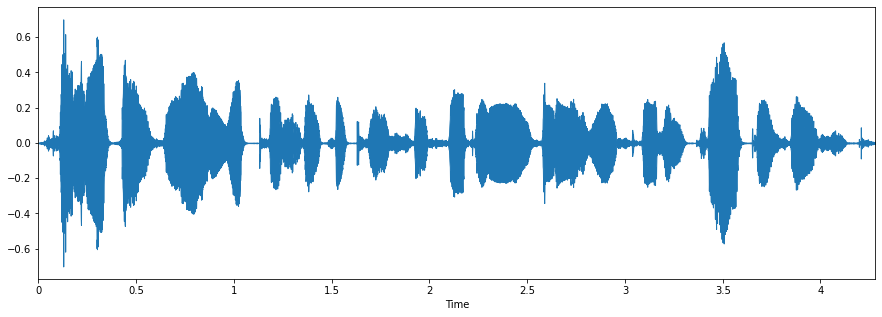

In [134]:
% pylab inline
import os
import pandas as pd
import librosa
import glob 

plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

In [135]:
#livedf= pd.DataFrame(columns=['feature'])
X, sample_rate = librosa.load(' Z.Disgust. S14 .neutral V.WAV', res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
sample_rate = np.array(sample_rate)
mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13),axis=0)
featurelive = mfccs
livedf2 = featurelive

In [136]:
livedf2= pd.DataFrame(data=livedf2)

In [137]:
livedf2 = livedf2.stack().to_frame().T

In [138]:
livedf2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215
,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,-5.267612,-6.705297,-10.332101,-9.43094,-8.549997,-10.595465,-12.62294,-15.13758,-16.329266,-18.763882,-21.208708,-21.321957,-14.795338,-10.815553,-10.402569,-13.051717,-13.268483,-13.815114,-14.836857,-15.444325,-14.912081,-12.841032,-13.229074,-14.244941,-15.203309,-13.712718,-12.027981,-10.916149,-13.162965,-13.565955,-11.892179,-14.444519,-15.279403,-15.760957,-17.195145,-17.509859,-15.047821,-15.411131,-15.534667,-15.9752,...,-20.562584,-20.31381,-16.032166,-13.86914,-12.280603,-14.191848,-13.849651,-13.163654,-12.420829,-14.561968,-15.950085,-16.156828,-16.309799,-13.86756,-12.044387,-10.760774,-10.542324,-11.130425,-11.88256,-10.817668,-10.256506,-10.43876,-9.795449,-10.790656,-10.562542,-11.991316,-12.558199,-12.546694,-13.302918,-11.195204,-10.409413,-10.663057,-9.193564,-8.790617,-10.027445,-7.129834,-9.053511,-14.66989,-17.245857,-19.884285


In [139]:
twodim= np.expand_dims(livedf2, axis=2)

In [140]:
livepreds = loaded_model.predict(twodim, 
                         batch_size=32, 
                         verbose=1)

1/1 [==============================] - 0s 169ms/step


In [141]:
livepreds

array([[5.3743879e-06, 2.2591903e-08, 9.9984789e-01, 4.3745427e-11,
        4.2942116e-08, 1.3867949e-04, 2.2865885e-08, 3.4605221e-11,
        7.9932643e-06, 6.6241372e-09, 1.5797620e-11, 4.1866233e-12]],
      dtype=float32)

In [142]:
livepreds1=livepreds.argmax(axis=1)

In [143]:
liveabc = livepreds1.astype(int).flatten()

In [144]:
livepredictions = (lb.inverse_transform((liveabc)))
livepredictions

array(['female_Disgust'], dtype=object)